{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Chapter Fifteen - Pandas Dataframes

In this chapter, you will learn about another commonly used data structure in Python for scientific data: **pandas** dataframes. You will write **Python** code to import text data (.csv) as **pandas** dataframes and to run calculations, summarize, and select data in **pandas** dataframes.

After completing this chapter, you will be able to:

* Describe the key characteristics of **pandas** dataframes.
* Import tabular data from .csv files into **pandas** dataframes.
* Run calculations and summarize data in **pandas** dataframes.
* Select data in **pandas** dataframes.


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You should have Conda setup on your computer and the Earth Analytics Python Conda environment. Follow the <a href="{{ site.url }}/workshops/setup-earth-analytics-python/setup-git-bash-conda/">Set up Git, Bash, and Conda on your computer</a> to install these tools.

Be sure that you have completed the chapters on <a href="{{ site.url }}/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/">Jupyter Notebook</a>, <a href="{{ site.url }}/courses/intro-to-earth-data-science/python-code-fundamentals/use-python-packages/">working with packages in Python</a>, <a href="{{ site.url }}/courses/intro-to-earth-data-science/python-code-fundamentals/work-with-files-directories-paths-in-python/">working with paths and directories in Python</a>, and <a href="{{ site.url }}/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/">working with numpy arrays</a>.

</div>


## What are Pandas Dataframes

In the chapters introducing **Python** lists and **numpy** arrays, you learn that both of these data structures can store collections of values, instead of just single values. You also learned that while **Python** lists are flexible and can store data items of various types (e.g. integers, floats, text strings), **numpy** arrays require all data elements to be of the same type. Because of this requirement, **numpy** arrays can provide more functionality for running calculations such as element-by-element arithmetic operations (e.g. multiplication of each element in the `numpy array` by the same value) that **Python** lists do not support.  

You may now be noticing that each data structure provides different functionality that can be useful in different workflows.

In this chapter, you will learn about **Pandas** dataframes, a data structure in **Python** that provides the ability to work with tabular data. **Pandas** dataframes are composed of rows and columns that can have header names, and the columns in **pandas** dataframes can be different types (e.g. the first column containing integers and the second column containing text strings). Each value in **pandas** dataframe is referred to as a cell that has a specific row index and column index within the tabular structure. 

The dataset below of average monthly precipitation (inches) for Boulder, CO provided by the <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html" target="_blank"> U.S. National Oceanic and Atmospheric Administration (NOAA)</a> is an example of the type of tabular dataset that can easily be imported into a **pandas** dataframe. 

month  | precip_in |
--- | --- |
Jan | 0.70 |
Feb | 0.75 |
Mar | 1.85 |
Apr | 2.93 |
May | 3.05 |
June | 2.02 |
July | 1.93 |
Aug | 1.62 |
Sept | 1.84 |
Oct | 1.31 |
Nov | 1.39 |
Dec | 0.84 |


## Distinguishing Characteristics of Pandas Dataframes

These characteristics (i.e. tabular format with rows and columns that can have headers) make **pandas** dataframes very versatile for not only storing different types, but for maintaining the relationships between cells across the same row and/or column. 

Recall that in the chapter on **numpy** arrays, you could not easily connect the values across two numpy arrays, such as those for `precip` and `months`. Using a **pandas** dataframe, the relationship between the value `January` in the `months` column and the value `0.70` in the `precip` column is maintained. 

month  | precip_in |
--- | --- |
Jan | 0.70 |

These two values (`January` and `0.70`) are considered part of the same record, representing the same observation in the **pandas** dataframe. In addition, **pandas** dataframes have other unique characteristics that differentiate them from other data structures: 

1. Each column in a **pandas** dataframe can have a label name (i.e. header name such as `months`) and can contain a different type of data from its neighboring columns (e.g. column_1 with numeric values and column_2 with text strings). 
2. By default, each row has an index within a range of values beginning at `[0]`. However, the row index in **pandas** dataframes can also be set as labels (e.g. a location name, date). 
3. All cells in a **pandas** dataframe have both a row index and a column index (i.e. two-dimensional table structure), even if there is only one cell (i.e. value) in the **pandas** dataframe. 
4. In addition to selecting cells through location-based indexing (e.g. cell at row 1, column 1), you can also query for data within **pandas** dataframes based on specific values (e.g. querying for specific text strings or numeric values). 
5. Because of the tabular structure, you can work with cells in **pandas** dataframes: 
    * across an entire row
    * across an entire column (or <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html" target="_blank">series</a>, a one-dimensional array in **pandas**)
    * by selecting cells based on location or specific values 
6. Due to its inherent tabular structure, **pandas** dataframes also allow for cells to have null values (i.e. no data value such as blank space, `NaN`, -999, etc).


## Tabular Structure of Pandas Dataframes

As described in the previous paragraphs, the structure of a **pandas** dataframe includes the column names and the rows that represent individual observations (i.e. records). 

In a typical **pandas** dataframe, the default row index is a range of values beginning at `[0]`, and the column headers are also organized into an index of the column names. 

The function `DataFrame` from **pandas** (e.g. `pd.DataFrame`) can be used to manually define a **pandas** dataframe. 

One way to use this function is to provide a list of column names (to the parameter `columns`) and a list of data values (to the parameter `data`), which is composed of individual lists of values for each row:

```python
# Dataframe with 2 columns and 2 rows
dataframe = pd.DataFrame(columns=["column_1", "column_2"],
                         data=[
                              [value_column_1, value_column_2],  
                              [value_column_1, value_column_2]
                         ])
```

In the example below, the **pandas** dataframe is created using the average monthly precipitation values in inches for Boulder, CO.  

The **pandas** dataframe is created with a column called `month` containing abbreviated month names as text strings and another column called `precip_in` for the precipitation (inches) as numeric values.

For example, the first row is created using `["Jan", 0.70]`, with `Jan` as the value for `month` and `0.70` as the value for `precip_in`.

In [1]:
import matplotlib.pyplot as plt
# Import pandas with alias pd
import pandas as pd

In [2]:
# Average monthly precip for Boulder, CO
avg_monthly_precip = pd.DataFrame(columns=["month", "precip_in"],
                                  data=[
                                       ["Jan", 0.70],  ["Feb", 0.75],
                                       ["Mar", 1.85],  ["Apr", 2.93],
                                       ["May", 3.05],  ["June", 2.02],
                                       ["July", 1.93], ["Aug", 1.62],
                                       ["Sept", 1.84], ["Oct", 1.31],
                                       ["Nov", 1.39],  ["Dec", 0.84]
])

# Notice the nicely formatted output without use of print
avg_monthly_precip

,month,precip_in
0,Jan,0.70
1,Feb,0.75
2,Mar,1.85
3,Apr,2.93
4,May,3.05
5,June,2.02
6,July,1.93
7,Aug,1.62
8,Sept,1.84
9,Oct,1.31


You can see from the **pandas** dataframe that each row has an index value, and that the default indexing still begins with `[0]`, as it does for `Python` lists and `numpy arrays`. 

## A Quick Plot 

You can plot **pandas** dataframe using **matplotlib** or using the pandas
`.plot()` method which wraps around **matplotlib**. 

/Users/leahwasser/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


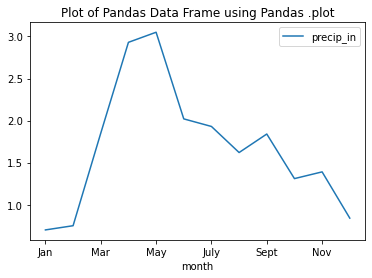

In [3]:
f, ax = plt.subplots()
avg_monthly_precip.plot(x="month",
                        y="precip_in",
                        title="Plot of Pandas Data Frame using Pandas .plot",
                        ax=ax)
plt.show()

Or you can plot using the standard **matplotlib** approach. In this
course we will encourage you to use the **matplotlib** approach which 
will be more flexible as you begin to create more complex plots. 


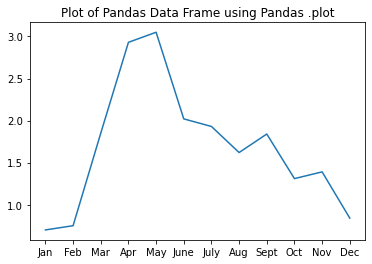

In [4]:
f, ax = plt.subplots()
ax.plot(avg_monthly_precip.month,
        avg_monthly_precip.precip_in)

ax.set(title="Plot of Pandas Data Frame using Pandas .plot")
plt.show()

In the pages that follow, you will learn how to import data from .csv files into **pandas** dataframes, run calculations and summary statistics on **pandas** dataframes, and select data from **pandas** dataframes.